In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random
import pykitti

In [7]:
np.set_printoptions(suppress=True, precision=6)
np.set_printoptions(edgeitems=30, linewidth=120)
basedir, date, drive = '../datasets/KITTI_SAMPLE_RAW/KITTI_SAMPLE/RAW', '2011_09_26', '0009'
dataset = pykitti.raw(basedir, date, drive, frames=range(0, 50, 1))

In [40]:
T = dataset.calib.T_cam2_velo

In [47]:
t = T[:-1, -1:]
t

array([[ 0.059372],
       [-0.075109],
       [-0.272133]])

In [21]:
ind1 = 35
lp = np.array(dataset.get_cam2(ind1)) 
rp = np.array(dataset.get_cam3(ind1))
lc = np.array(dataset.get_cam2(ind1+1)) 
rc = np.array(dataset.get_cam3(ind1+1))

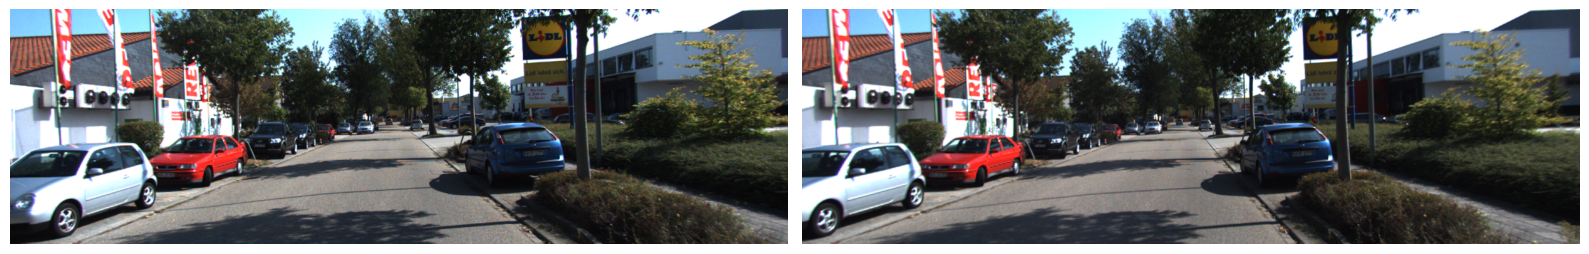

In [23]:
plt.figure(figsize=(16, 12))
plt.subplot(121)
plt.imshow(lp), plt.axis('off')
plt.subplot(122)
plt.imshow(rp), plt.axis('off')
plt.tight_layout()

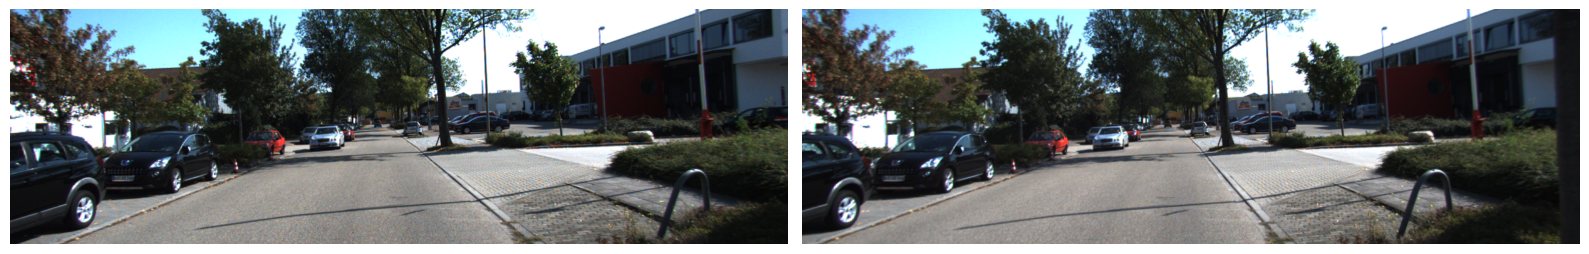

In [ ]:
plt.figure(figsize=(16, 12))
plt.subplot(121)
plt.imshow(lc), plt.axis('off')
plt.subplot(122)
plt.imshow(rc), plt.axis('off')
plt.tight_layout()

In [16]:
s = cv2.SIFT_create()

In [25]:
kp_01, desc_01 = s.detectAndCompute(lc, None)

In [27]:
kp_02, desc_02 = s.detectAndCompute(lp, None)
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(desc_01,desc_02)
l1 = np.array([kp_01[match.queryIdx].pt for match in matches])
l2 = np.array([kp_02[match.trainIdx].pt for match in matches])

E1, _ = cv2.findEssentialMat(l1, l2, method=cv2.FM_8POINT+cv2.FM_RANSAC)
_, _, t3, _ = cv2.recoverPose(E, l1, l2)

In [31]:
kp_02, desc_02 = s.detectAndCompute(rp, None)
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(desc_01,desc_02)
l1 = np.array([kp_01[match.queryIdx].pt for match in matches])
l2 = np.array([kp_02[match.trainIdx].pt for match in matches])

E, _ = cv2.findEssentialMat(l1, l2, method=cv2.FM_8POINT+cv2.FM_RANSAC)
_, _, t3, _ = cv2.recoverPose(E, l1, l2)

In [32]:
print(E1)

[[ 0.       -0.001112  0.209682]
 [ 0.001114 -0.000001 -0.675302]
 [-0.21026   0.675122 -0.000003]]


In [33]:
print(E2)

[[ 0.000003  0.002097 -0.40208 ]
 [-0.002117  0.000014  0.581659]
 [ 0.402635 -0.581275  0.000022]]


In [19]:
l1 = np.array([kp_01[match.queryIdx].pt for match in matches])
l2 = np.array([kp_02[match.trainIdx].pt for match in matches])

E, _ = cv2.findEssentialMat(l1, l2, method=cv2.FM_8POINT+cv2.FM_RANSAC)

In [ ]:
retval, R, t2, mask = cv2.recoverPose(E, l1, l2)

In [36]:
print(R)

[[ 1.        0.000856  0.000003]
 [-0.000856  1.       -0.000003]
 [-0.000003  0.000003  1.      ]]


In [37]:
print(t)

[[0.955021]
 [0.296535]
 [0.001573]]
